# Read Data 

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read data
df = pd.read_csv('/content/drive/My Drive/Colab/tweet-sentiment-extraction/train.csv', header = 0)
# df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/test.csv', header = 0)
# df_sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/sample_submission.csv', header = 0)

In [ ]:
df.info() #one NAN 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


# Data Preprocessing

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


partition

In [ ]:
from sklearn.model_selection import train_test_split
Y = df['selected_text']
X = df.drop(columns=['selected_text'])
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_train

,textID,text,sentiment
13745,1376de5329,Just Finished My English Final...Just One Step...,neutral
7040,aac1cc6fd4,Also with the not driving part i could afford ...,positive
20748,9672b4ee61,GREEN DAY IS PERFORMING ON SNL NEXT WEEK! sor...,neutral
21642,44e7f97625,I am never going to get these pictures taken,neutral
8301,ab1368e993,why thank you. Couldn`t resist it,neutral
...,...,...,...
10956,fcc45b5d05,_girl - Bummer...mail came but package didn`t,negative
17290,62ae10ec84,My trip to Igbaras will be postponed to next week,neutral
5193,66ab9d1f77,"Just an observation: Aside from the riverwalk,...",neutral
12173,35d06c1169,Probably because it wasnt a command...bet you ...,neutral


In [ ]:
Y_train = pd.DataFrame(Y_train)
Y_train

,selected_text
13745,Just Finished My English Final...Just One Step...
7040,save ev
20748,"sorry, that made me happy and i`m still all di..."
21642,I am never going to get these pictures taken
8301,why thank you. Couldn`t resist it
...,...
10956,Bummer..
17290,My trip to Igbaras will be postponed to next week
5193,"Just an observation: Aside from the riverwalk,..."
12173,Probably because it wasnt a command...bet you ...


In [ ]:
df_train = X_train.join(Y_train)
df_train.sort_index()

,textID,text,sentiment,selected_text
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD
3,9642c003ef,what interview! leave me alone,negative,leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of ****,"
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,neutral,http://www.dothebouncy.com/smf - some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,fun
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative,d lost
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative,", don`t force"
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive,Yay good for both of you.
27479,ed167662a5,But it was worth it ****.,positive,But it was worth it ****.


In [ ]:
df_test = X_test.copy()
df_test.sort_index()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
2,088c60f138,my boss is bullying me...,negative
11,16fab9f95b,I really really like the song Love Story by Ta...,positive
13,04dd1d2e34,i want to go to music tonight but i lost my vo...,negative
19,40e7becabf,Hes just not that into you,neutral
...,...,...,...
27457,58804bf427,My camera is brokennn,neutral
27458,ea8072c6a6,I really wish someone would make a groupchat t...,positive
27464,e7eecffdc8,rec game....trying not to cry...the pain is to...,negative
27467,432e6de6c9,morning twit-friends! welcome to my new followers,positive


In [ ]:
Y_test = pd.DataFrame(Y_test)
Y_test

,selected_text
1638,smH daTs whacK
14748,"oh dear, thats not good - I hope you get throu..."
5456,stuvk with the wee stpid thing fo
19241,uni email is helpful..
4067,", Just read an article that buying IP`s doesn`..."
...,...
16790,"MC, happy mother`s day to your mom ;).. love yah"
8199,Glad you are happy!
8168,mcfly anit been on here in ages z
19326,that`s not good to hear! i hope everything is...


In [ ]:
df_sample = X_test.join(Y_test)
df_sample

,textID,text,sentiment,selected_text
1638,50726f1adb,smH daTs whacK,neutral,smH daTs whacK
14748,8a87bf47ff,"oh dear, thats not good - I hope you get thro...",neutral,"oh dear, thats not good - I hope you get throu..."
5456,f90dccdae7,"this hole twitter thing is new too me, its not...",negative,stuvk with the wee stpid thing fo
19241,884476afed,"@_elj Appreciated,uni email is helpful..",positive,uni email is helpful..
4067,1f27adbaa5,", Just read an article that buying IP`s doesn...",neutral,", Just read an article that buying IP`s doesn`..."
...,...,...,...,...
16790,b5e3b51d4c,"MC, happy mother`s day to your mom ;).. love yah",positive,"MC, happy mother`s day to your mom ;).. love yah"
8199,7bb003fcac,Glad you are happy!,positive,Glad you are happy!
8168,5f4484b1e4,mcfly anit been on here in ages z,neutral,mcfly anit been on here in ages z
19326,8e74e2abc3,that`s not good to hear! i hope everything i...,neutral,that`s not good to hear! i hope everything is...


# Feature Extract

In [ ]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
results_jaccard=[]

for ind,row in df_train.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [ ]:
df_train

,textID,text,sentiment,selected_text
13745,1376de5329,Just Finished My English Final...Just One Step...,neutral,Just Finished My English Final...Just One Step...
7040,aac1cc6fd4,Also with the not driving part i could afford ...,positive,save ev
20748,9672b4ee61,GREEN DAY IS PERFORMING ON SNL NEXT WEEK! sor...,neutral,"sorry, that made me happy and i`m still all di..."
21642,44e7f97625,I am never going to get these pictures taken,neutral,I am never going to get these pictures taken
8301,ab1368e993,why thank you. Couldn`t resist it,neutral,why thank you. Couldn`t resist it
...,...,...,...,...
10956,fcc45b5d05,_girl - Bummer...mail came but package didn`t,negative,Bummer..
17290,62ae10ec84,My trip to Igbaras will be postponed to next week,neutral,My trip to Igbaras will be postponed to next week
5193,66ab9d1f77,"Just an observation: Aside from the riverwalk,...",neutral,"Just an observation: Aside from the riverwalk,..."
12173,35d06c1169,Probably because it wasnt a command...bet you ...,neutral,Probably because it wasnt a command...bet you ...


In [ ]:
jaccards  = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
df_train = df_train.merge(jaccards,how='outer')

In [ ]:
df_train

,textID,text,sentiment,selected_text,jaccard_score
0,1376de5329,Just Finished My English Final...Just One Step...,neutral,Just Finished My English Final...Just One Step...,1.000000
1,aac1cc6fd4,Also with the not driving part i could afford ...,positive,save ev,0.055556
2,9672b4ee61,GREEN DAY IS PERFORMING ON SNL NEXT WEEK! sor...,neutral,"sorry, that made me happy and i`m still all di...",0.652174
3,44e7f97625,I am never going to get these pictures taken,neutral,I am never going to get these pictures taken,1.000000
4,ab1368e993,why thank you. Couldn`t resist it,neutral,why thank you. Couldn`t resist it,1.000000
...,...,...,...,...,...
21979,fcc45b5d05,_girl - Bummer...mail came but package didn`t,negative,Bummer..,0.000000
21980,62ae10ec84,My trip to Igbaras will be postponed to next week,neutral,My trip to Igbaras will be postponed to next week,1.000000
21981,66ab9d1f77,"Just an observation: Aside from the riverwalk,...",neutral,"Just an observation: Aside from the riverwalk,...",1.000000
21982,35d06c1169,Probably because it wasnt a command...bet you ...,neutral,Probably because it wasnt a command...bet you ...,1.000000


In [ ]:
df_train['Num_words_ST'] = df_train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
df_train['Num_word_text'] = df_train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
df_train['difference_in_words'] = df_train['Num_word_text'] - df_train['Num_words_ST'] #Difference in Number of words text and Selected Text

In [ ]:
df_train

,textID,text,sentiment,selected_text,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,1376de5329,Just Finished My English Final...Just One Step...,neutral,Just Finished My English Final...Just One Step...,1.000000,11,11,0
1,aac1cc6fd4,Also with the not driving part i could afford ...,positive,save ev,0.055556,2,21,19
2,9672b4ee61,GREEN DAY IS PERFORMING ON SNL NEXT WEEK! sor...,neutral,"sorry, that made me happy and i`m still all di...",0.652174,15,23,8
3,44e7f97625,I am never going to get these pictures taken,neutral,I am never going to get these pictures taken,1.000000,9,9,0
4,ab1368e993,why thank you. Couldn`t resist it,neutral,why thank you. Couldn`t resist it,1.000000,6,6,0
...,...,...,...,...,...,...,...,...
21979,fcc45b5d05,_girl - Bummer...mail came but package didn`t,negative,Bummer..,0.000000,1,7,6
21980,62ae10ec84,My trip to Igbaras will be postponed to next week,neutral,My trip to Igbaras will be postponed to next week,1.000000,10,10,0
21981,66ab9d1f77,"Just an observation: Aside from the riverwalk,...",neutral,"Just an observation: Aside from the riverwalk,...",1.000000,17,17,0
21982,35d06c1169,Probably because it wasnt a command...bet you ...,neutral,Probably because it wasnt a command...bet you ...,1.000000,19,19,0


# Training

In [ ]:
## creating data in spacy data input format

def get_training_data(sentiment):
    train_data = []
    for index, row in df_train.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [ ]:
def save_model(output_dir, nlp, new_model_name):
    output_dir = f'/content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [ ]:
def get_model_out_path(sentiment):
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    else:
        model_out_path = 'models/model_neu'
    return model_out_path
    

In [ ]:
# pass model = nlp if you want to train on top of existing model 

def train(train_data, output_dir, n_iter=20, model=None):
    """Load the model, set up the pipeline and train the entity recognizer."""
    ""
    if model is not None:
        nlp = spacy.load(output_dir)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")

    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()

        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001))    
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,   # dropout - make it harder to memorise data
                    losses=losses, 
                )
            
            print("Losses", losses)
    save_model(output_dir, nlp, 'st_ner')

In [ ]:
import spacy
from tqdm import tqdm
import random
import os
from spacy.util import minibatch
from spacy.util import compounding
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sentiment1 = 'positive'
sentiment2 = 'negative'
sentiment0 = 'neutral'

train_data1 = get_training_data(sentiment1)
model_path1 = get_model_out_path(sentiment1)

train_data2 = get_training_data(sentiment2)
model_path2 = get_model_out_path(sentiment2)

train_data0 = get_training_data(sentiment0)
model_path0 = get_model_out_path(sentiment0)

# for demo purpose i am just training the model for 2 iterations, feel free to experiment.
train(train_data1, model_path1, n_iter=2, model=None)
train(train_data2, model_path2, n_iter=2, model=None)
train(train_data0, model_path0, n_iter=2, model=None)

  0%|          | 0/2 [00:00<?, ?it/s]

Created blank 'en' model


 50%|█████     | 1/2 [00:36<00:36, 36.07s/it]

Losses {'ner': 27664.34354382666}


100%|██████████| 2/2 [01:11<00:00, 35.94s/it]

Losses {'ner': 25595.12341389383}
Saved model to /content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/models/model_pos



  0%|          | 0/2 [00:00<?, ?it/s]

Created blank 'en' model


 50%|█████     | 1/2 [00:34<00:34, 34.48s/it]

Losses {'ner': 26140.678024868248}


100%|██████████| 2/2 [01:09<00:00, 34.99s/it]

Losses {'ner': 23666.747516752082}
Saved model to /content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/models/model_neg



  0%|          | 0/2 [00:00<?, ?it/s]

Created blank 'en' model


 50%|█████     | 1/2 [00:45<00:45, 45.21s/it]

Losses {'ner': 6333.933339557712}


100%|██████████| 2/2 [01:32<00:00, 46.34s/it]

Losses {'ner': 4369.565496554366}
Saved model to /content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/models/model_neu


In [ ]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [ ]:
model_pos = spacy.load('/content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/models/' + 'model_pos')
model_neg = spacy.load('/content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/models/' + 'model_neg')
model_neu = spacy.load('/content/drive/My Drive/Colab Notebooks/6000/tweet-sentiment-extraction/models/' + 'model_neu')

In [ ]:
jaccard_score = 0
for index, row in tqdm(df_train.iterrows(), total=df_train.shape[0]):
  text = row.text
  if row.sentiment == 'neutral':
      jaccard_score += jaccard(predict_entities(text, model_neu), row.selected_text)
  elif row.sentiment == 'positive':
      jaccard_score += jaccard(predict_entities(text, model_pos), row.selected_text)
  else:
      jaccard_score += jaccard(predict_entities(text, model_neg), row.selected_text) 
  
print(f'Average Jaccard Score is {jaccard_score / df_train.shape[0]}') 

100%|██████████| 21984/21984 [01:08<00:00, 320.23it/s]

Average Jaccard Score is 0.6512799930959887


# Predicting

In [ ]:
from pandas_profiling import ProfileReport
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors 
import pickle
import nltk

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import tools
# import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from collections import Counter # suppress warnings

In [ ]:
selected_texts = []

for index, row in df_test.iterrows():
  text = row.text
  output_str = ""
  if row.sentiment == 'neutral' or len(text.split()) < 4:
#             output_str = text
#             selected_texts.append(predict_entities(text, model_neu))
      selected_texts.append(text)
  elif row.sentiment == 'positive':
      selected_texts.append(predict_entities(text, model_pos))
  else:
      selected_texts.append(predict_entities(text, model_neg))
        
df_test['selected_text'] = selected_texts

In [ ]:
df_test

,textID,text,sentiment,selected_text
1638,50726f1adb,smH daTs whacK,neutral,smH daTs whacK
14748,8a87bf47ff,"oh dear, thats not good - I hope you get thro...",neutral,"oh dear, thats not good - I hope you get thro..."
5456,f90dccdae7,"this hole twitter thing is new too me, its not...",negative,"this hole twitter thing is new too me, its not..."
19241,884476afed,"@_elj Appreciated,uni email is helpful..",positive,"Appreciated,"
4067,1f27adbaa5,", Just read an article that buying IP`s doesn...",neutral,", Just read an article that buying IP`s doesn..."
...,...,...,...,...
16790,b5e3b51d4c,"MC, happy mother`s day to your mom ;).. love yah",positive,happy
8199,7bb003fcac,Glad you are happy!,positive,Glad you are happy!
8168,5f4484b1e4,mcfly anit been on here in ages z,neutral,mcfly anit been on here in ages z
19326,8e74e2abc3,that`s not good to hear! i hope everything i...,neutral,that`s not good to hear! i hope everything i...


# Evaluation(jaccard)

In [ ]:
r = pd.DataFrame(df_test.copy()['selected_text'])
g = pd.DataFrame(df_sample.copy()['selected_text'])
g.rename(columns = {'selected_text':'groud_truth'},inplace = True)
result = r.join(g)

In [ ]:
result

,selected_text,groud_truth
1638,smH daTs whacK,smH daTs whacK
14748,"oh dear, thats not good - I hope you get thro...","oh dear, thats not good - I hope you get throu..."
5456,"this hole twitter thing is new too me, its not...",stuvk with the wee stpid thing fo
19241,"Appreciated,",uni email is helpful..
4067,", Just read an article that buying IP`s doesn...",", Just read an article that buying IP`s doesn`..."
...,...,...
16790,happy,"MC, happy mother`s day to your mom ;).. love yah"
8199,Glad you are happy!,Glad you are happy!
8168,mcfly anit been on here in ages z,mcfly anit been on here in ages z
19326,that`s not good to hear! i hope everything i...,that`s not good to hear! i hope everything is...


In [ ]:
score = []

for ind,row in result.iterrows():
    sentence1 = row.groud_truth
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    score.append([sentence1,sentence2,jaccard_score])

In [ ]:
result = pd.DataFrame(score,columns=["groud_truth","selected_text","jaccard_score"])

In [ ]:
result

,groud_truth,selected_text,jaccard_score
0,smH daTs whacK,smH daTs whacK,1.000000
1,"oh dear, thats not good - I hope you get throu...","oh dear, thats not good - I hope you get thro...",1.000000
2,stuvk with the wee stpid thing fo,"this hole twitter thing is new too me, its not...",0.240000
3,uni email is helpful..,"Appreciated,",0.000000
4,", Just read an article that buying IP`s doesn`...",", Just read an article that buying IP`s doesn...",0.944444
...,...,...,...
5491,"MC, happy mother`s day to your mom ;).. love yah",happy,0.100000
5492,Glad you are happy!,Glad you are happy!,1.000000
5493,mcfly anit been on here in ages z,mcfly anit been on here in ages z,1.000000
5494,that`s not good to hear! i hope everything is...,that`s not good to hear! i hope everything i...,0.409091


In [ ]:
result['jaccard_score'].mean()

0.6321956721396328

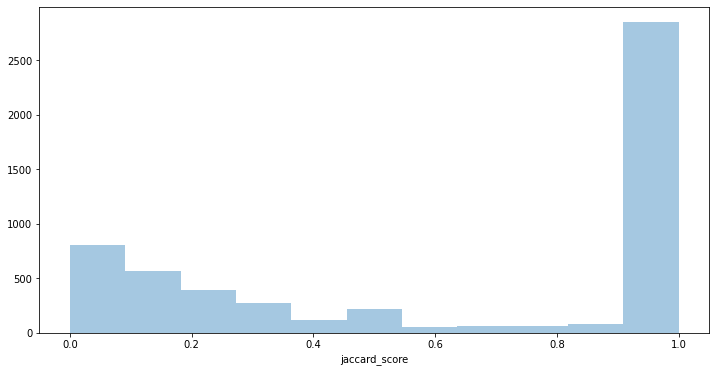

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(result['jaccard_score'],kde=False)

In [ ]:
#when  Num_word_text <=2
#keep original text